In [2]:
import numpy as np
import pandas as pd
import pysd as pysd #v.3.3.0
import matplotlib.pyplot as plt
import stan_integration as si
from matplotlib import animation
#!pip install -r ../requirements.txt

/Users/hyunjimoon/Dropbox/code/defense-reliability/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
modP = pysd.read_vensim('./system_models/fixedPeriod.mdl')
modQ = pysd.read_vensim('./system_models/fixedQuantity.mdl')

In [6]:
stocksP = modP.run()
stocksQ = modQ.run()

In [7]:
print("P system :", stocksP.Cost.iloc[-1,])
print("Q system :", stocksQ.Cost.iloc[-1,])b

P system : 18717.925929020734
Q system : 2313.4831222231815


In [10]:
stocksP #QQ why the demand is not changing?

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Fixed Period,Inventory,Purchase Amount,Target Inventory,SupplyLine,Lead Time Adjustment Period,...,BacklogOut,Backlog,Sales,BacklogIn,Purchasing,Lead Time,Shipping,Demand,Demand Forecast,Forecast Period
0,100,0,1,1,7,1000.000000,0.000000,1500,1354.031405,5,...,100.000000,100.000000,100.000000,112.725414,0.000000,12.011767,112.725414,112.725414,112.725414,5
1,100,0,1,1,7,1012.725414,0.000000,1500,1241.305992,5,...,112.725414,112.725414,112.725414,112.725414,0.000000,12.011767,103.340832,112.725414,112.725414,5
2,100,0,1,1,7,1003.340832,0.000000,1500,1137.965160,5,...,112.725414,112.725414,112.725414,112.725414,0.000000,12.011767,94.737532,112.725414,112.725414,5
3,100,0,1,1,7,985.352950,0.000000,1500,1043.227628,5,...,112.725414,112.725414,112.725414,112.725414,0.000000,12.011767,86.850471,112.725414,112.725414,5
4,100,0,1,1,7,959.478008,0.000000,1500,956.377157,5,...,112.725414,112.725414,112.725414,112.725414,0.000000,12.011767,79.620022,112.725414,112.725414,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,100,0,1,1,7,79.943111,0.000000,1500,880.314911,5,...,79.943111,1927.745554,79.943111,112.725414,0.000000,12.011767,73.287711,112.725414,112.725414,5
97,100,0,1,1,7,73.287711,619.685089,1500,807.027200,5,...,73.287711,1960.527856,73.287711,112.725414,619.685089,12.011767,67.186385,112.725414,112.725414,5
98,100,0,1,1,7,67.186385,0.000000,1500,1359.525904,5,...,67.186385,1999.965559,67.186385,112.725414,0.000000,12.011767,113.182840,112.725414,112.725414,5
99,100,0,1,1,7,113.182840,0.000000,1500,1246.343064,5,...,113.182840,2045.504588,113.182840,112.725414,0.000000,12.011767,103.760176,112.725414,112.725414,5


<AxesSubplot:>

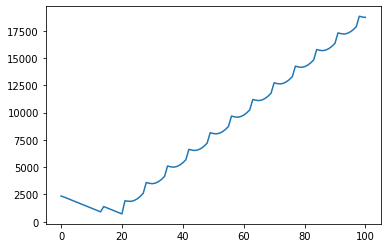

In [8]:
stocksP.Cost.plot()

In [11]:
stocksQ

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Fixed Order Quantity,Supply Line,Service Policy Coefficient,Purchase Amount,Reorder Quantity,Inventory,...,Backlog Out,Backlog,Selling,Backlog In,Purchasing,Lead Time,Shipping,Demand,Demand Forecast,Forecaset Period
0,100,0,1,1,1000,1372.622449,2,0,1742.009989,1000.000000,...,100.000000,100.000000,100.000000,100.597367,0,13.644715,100.597367,100.597367,100.597367,5
1,100,0,1,1,1000,1272.025082,2,0,1742.009989,1000.597367,...,100.597367,100.597367,100.597367,100.597367,0,13.644715,93.224742,100.597367,100.597367,5
2,100,0,1,1,1000,1178.800340,2,0,1742.009989,993.224742,...,100.597367,100.597367,100.597367,100.597367,0,13.644715,86.392446,100.597367,100.597367,5
3,100,0,1,1,1000,1092.407894,2,0,1742.009989,979.019821,...,100.597367,100.597367,100.597367,100.597367,0,13.644715,80.060878,100.597367,100.597367,5
4,100,0,1,1,1000,1012.347017,2,0,1742.009989,958.483332,...,100.597367,100.597367,100.597367,100.597367,0,13.644715,74.193340,100.597367,100.597367,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,100,0,1,1,1000,949.393057,2,1000,1742.009989,766.479533,...,100.597367,100.597367,100.597367,100.597367,1000,13.644715,69.579542,100.597367,100.597367,5
97,100,0,1,1,1000,1879.813514,2,0,1742.009989,735.461709,...,100.597367,100.597367,100.597367,100.597367,0,13.644715,137.768612,100.597367,100.597367,5
98,100,0,1,1,1000,1742.044902,2,0,1742.009989,772.632954,...,100.597367,100.597367,100.597367,100.597367,0,13.644715,127.671765,100.597367,100.597367,5
99,100,0,1,1,1000,1614.373138,2,0,1742.009989,799.707352,...,100.597367,100.597367,100.597367,100.597367,0,13.644715,118.314899,100.597367,100.597367,5


<AxesSubplot:>

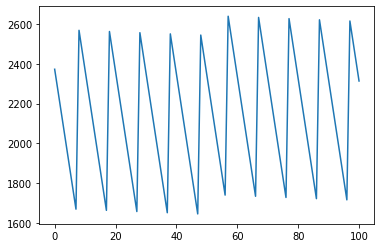

In [9]:
stocksQ.Cost.plot()